### IMPORTS

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path

### CARREGANDO ARQUIVOS

In [2]:
BASE_DIR = Path.cwd().parent
sys.path.append(str(BASE_DIR / "src" / "ml"))

from train_baseline import train_baseline_models
from train_ml_models import train_ml_models
from train_time_series import train_time_series_models
from organize_metrics import consolidate_metrics

DATA_PATH = BASE_DIR / "data" / "processed" / "ml_dataset.csv"

### EXECUTANDO MODELOS

Baseline

In [3]:
baseline_metrics = train_baseline_models(DATA_PATH)

Série Temporal

In [4]:
df = pd.read_csv(DATA_PATH)
sarima_metrics, forecasts = train_time_series_models(df)

Machine Learning

In [5]:
rf_metrics, xgb_metrics = train_ml_models(DATA_PATH)

### CONSOLIDAR RESULTADOS

In [6]:
metrics_df = consolidate_metrics()
metrics_df.head(15)

c:\Users\usuario\Documents\bagunca do pedro\Projetos Ciencia de Dados\Projeto Empresa Ficticia\Pretoleira Gamarra\src\ml\organize_metrics.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_metrics_df = pd.concat(dfs, ignore_index=True)


,target,modelo,MAE,RMSE,MAPE,R2
0,target_producao_next,XGBoost,3.479003e+05,4.507524e+05,0.041418,NaN
1,target_receita_next,XGBoost,2.081794e+08,3.103755e+08,0.128135,NaN
2,target_producao_next,RandomForest,4.631776e+05,5.505472e+05,0.054967,NaN
3,target_receita_next,RandomForest,1.897276e+08,2.921204e+08,0.113884,NaN
4,target_producao_next,NaN,2.742862e+05,3.463345e+05,NaN,0.636277
5,target_receita_next,NaN,3.297584e+08,5.583096e+08,NaN,0.149333


### VISUALIZAÇÃO COMPARATIVA

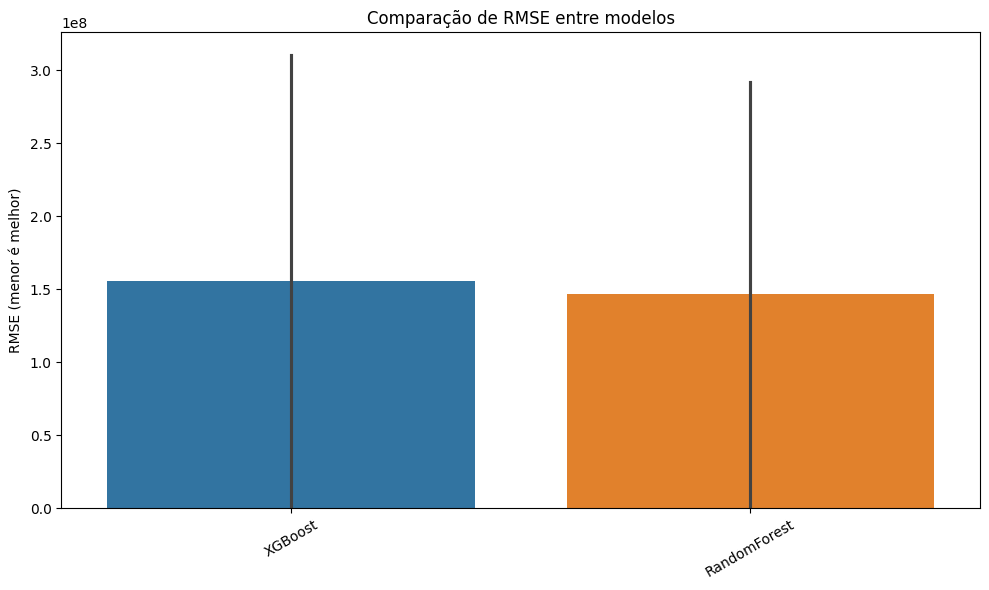

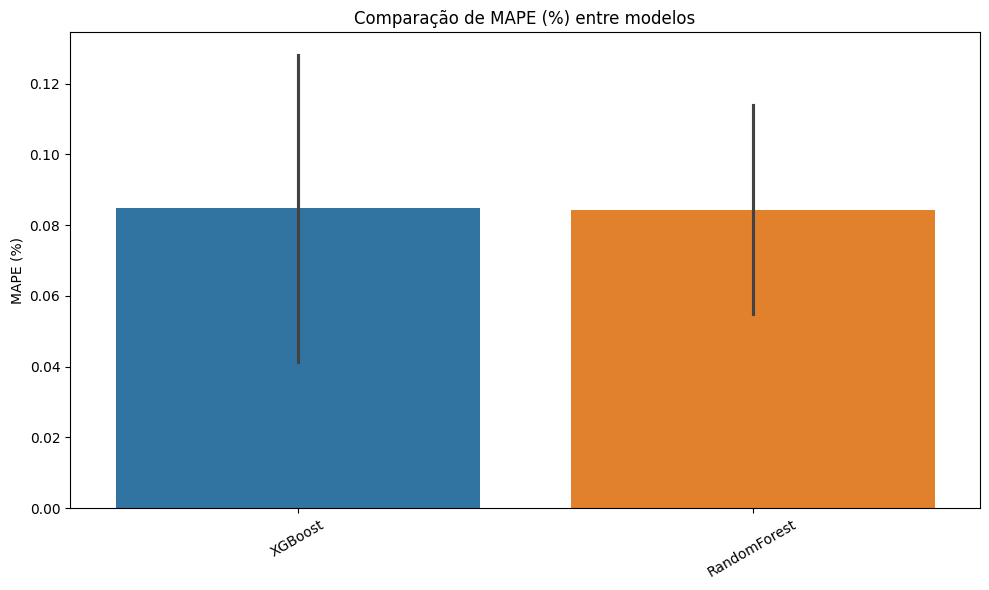

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_df, x="modelo", y="RMSE", hue="modelo")
plt.title("Comparação de RMSE entre modelos")
plt.ylabel("RMSE (menor é melhor)")
plt.xlabel("")
plt.xticks(rotation=30)
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_df, x="modelo", y="MAPE", hue="modelo")
plt.title("Comparação de MAPE (%) entre modelos")
plt.ylabel("MAPE (%)")
plt.xlabel("")
plt.xticks(rotation=30)
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()

### ANALISE DE PREVISAO DOS ULTIMOS MESES

In [8]:
# Concatenar todos os resultados
all_metrics = pd.concat([
    baseline_metrics.assign(origem="Baseline"),
    rf_metrics.assign(origem="Random Forest"),
    xgb_metrics.assign(origem="XGBoost"),
    sarima_metrics.assign(origem="SARIMA"),
], ignore_index=True)

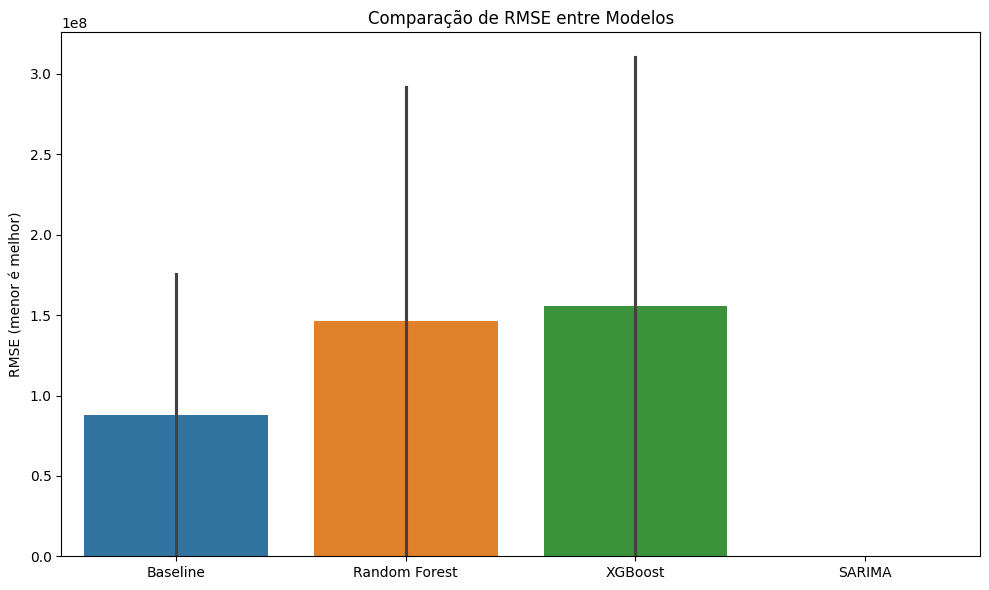

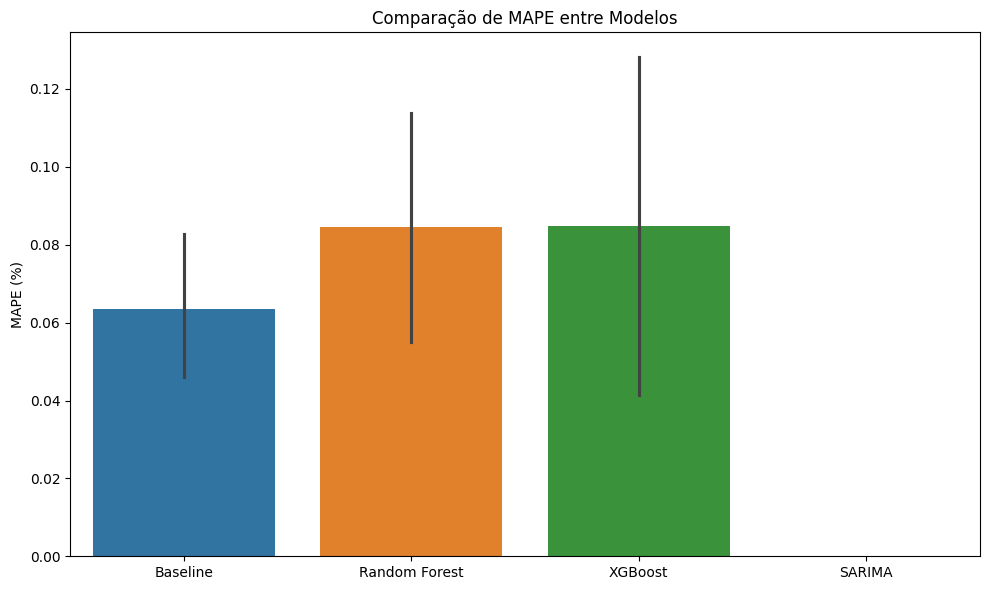

In [9]:

# Plot RMSE
plt.figure(figsize=(10, 6))
sns.barplot(data=all_metrics, x="origem", y="RMSE", hue="origem")
plt.title("Comparação de RMSE entre Modelos")
plt.ylabel("RMSE (menor é melhor)")
plt.xlabel("")
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()

# Plot MAPE
plt.figure(figsize=(10, 6))
sns.barplot(data=all_metrics, x="origem", y="MAPE", hue="origem")
plt.title("Comparação de MAPE entre Modelos")
plt.ylabel("MAPE (%)")
plt.xlabel("")
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()

### RESUMO FINAL

In [ ]:
# Filtrar apenas linhas com modelo e RMSE válido
valid_metrics = metrics_df.dropna(subset=["modelo", "RMSE"])
best_model = valid_metrics.sort_values("RMSE").iloc[0]

print(f"Melhor modelo: {best_model['modelo']}")
print(f"Target: {best_model['target']}")
print(f"MAE: {best_model['MAE']:.2f}, RMSE: {best_model['RMSE']:.2f}, MAPE: {best_model['MAPE'] if pd.notna(best_model['MAPE']) else 'N/A'}%")



 Melhor modelo: XGBoost
Target: target_producao_next
MAE: 347900.29, RMSE: 450752.35, MAPE: 0.0414176076611079%
